In [1]:
%load_ext autoreload
%autoreload 2

import sklearn
import os, sys
import numpy as np
import tensorflow as tf
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

sys.path.insert(1, os.path.join(sys.path[0], ".."))
sys.path.append('../../')
from reproduction.pipeline.load import load_data
from reproduction import analysis

In [2]:
def gridsearch(start, step, stop):
    with open(ENCODER_DEF,"r") as f:
            encoder = tf.keras.models.model_from_json(f.read())
    encoder.load_weights(ENCODER_WEIGHTS)
    data = analysis.AEData(load_data(DATA, encoder.input_shape[1:]), n=5000)
    data.add_encoder(encoder)
    search_results = [] # Force initialization
    for i in range(start, stop, step):
        N_CLUSTERS = i
        ag1 = AgglomerativeClustering(n_clusters=N_CLUSTERS).fit_predict(data.encs[:2500])
        ag2 = AgglomerativeClustering(n_clusters=N_CLUSTERS).fit_predict(data.encs)
        minfo = sklearn.metrics.adjusted_mutual_info_score(ag1, ag2[:2500])
        print('Clusters: ',i,' Mutual information: ', minfo)
        search_results.append((i, minfo))
    return max(search_results,key=lambda item:item[1])
    

In [3]:
DATA = "/project/foster/clouds/data/2015_05/*.tfrecord"
ENCODER_DEF = "/home/rlourenco/rdcep_clouds/output/m9-22_oceans/encoder.json"
ENCODER_WEIGHTS = "/home/rlourenco/rdcep_clouds/output/m9-22_oceans/encoder.h5"
# N_CLUSTERS = 10

In [4]:
result = gridsearch(2,1,500)
N_CLUSTERS = result[0]
HiMI = result[1]
print('Best result: Clusters# ',N_CLUSTERS,' Mutual information# ', HiMI)

/home/rlourenco/miniconda3/envs/clouds-analysis-cpu/lib/python3.6/site-packages/tensorflow/python/keras/layers/core.py:764: UserWarning: models is not loaded, but a Lambda layer uses it. It may cause errors.
  , UserWarning)


Instructions for updating:
Use `tf.data.Dataset.batch(..., drop_remainder=True)`.
Clusters:  2  Mutual information:  0.720531271734139
Clusters:  3  Mutual information:  0.6334881910503822
Clusters:  4  Mutual information:  0.6039305379683794
Clusters:  5  Mutual information:  0.6290676441334659
Clusters:  6  Mutual information:  0.6871311222789398
Clusters:  7  Mutual information:  0.6991447954305913
Clusters:  8  Mutual information:  0.6906819639424163
Clusters:  9  Mutual information:  0.639324153179179
Clusters:  10  Mutual information:  0.6662427687197595
Clusters:  11  Mutual information:  0.6694150174622161
Clusters:  12  Mutual information:  0.6725582904832345
Clusters:  13  Mutual information:  0.7124729703471597
Clusters:  14  Mutual information:  0.7160376474206066
Clusters:  15  Mutual information:  0.704892179513179
Clusters:  16  Mutual information:  0.7003249973437655
Clusters:  17  Mutual information:  0.7008951818377699
Clusters:  18  Mutual information:  0.69426587786

Clusters:  146  Mutual information:  0.7418812210300145
Clusters:  147  Mutual information:  0.7435017591566835
Clusters:  148  Mutual information:  0.7423271630627226
Clusters:  149  Mutual information:  0.7422682918299945
Clusters:  150  Mutual information:  0.7406056750416383
Clusters:  151  Mutual information:  0.7403315669152536
Clusters:  152  Mutual information:  0.7402640685681577
Clusters:  153  Mutual information:  0.7397788858076587
Clusters:  154  Mutual information:  0.7398736881764617
Clusters:  155  Mutual information:  0.7408258333694128
Clusters:  156  Mutual information:  0.7404363091396939
Clusters:  157  Mutual information:  0.7397275059581158
Clusters:  158  Mutual information:  0.7416591087762621
Clusters:  159  Mutual information:  0.7417158776281243
Clusters:  160  Mutual information:  0.7411739395590757
Clusters:  161  Mutual information:  0.7408238238327317
Clusters:  162  Mutual information:  0.7413840669352743
Clusters:  163  Mutual information:  0.740154910

Clusters:  293  Mutual information:  0.7055879914149052
Clusters:  294  Mutual information:  0.7063014794722019
Clusters:  295  Mutual information:  0.7066149207309872
Clusters:  296  Mutual information:  0.7063157366389772
Clusters:  297  Mutual information:  0.70672620486068
Clusters:  298  Mutual information:  0.7072701171183857
Clusters:  299  Mutual information:  0.7051903530998345
Clusters:  300  Mutual information:  0.704693287598248
Clusters:  301  Mutual information:  0.7043775984435218
Clusters:  302  Mutual information:  0.7045554306163967
Clusters:  303  Mutual information:  0.7048715527613524
Clusters:  304  Mutual information:  0.7054410626562819
Clusters:  305  Mutual information:  0.7055780953708217
Clusters:  306  Mutual information:  0.7051810681218176
Clusters:  307  Mutual information:  0.7056915216001131
Clusters:  308  Mutual information:  0.7076316237921597
Clusters:  309  Mutual information:  0.7066338974137428
Clusters:  310  Mutual information:  0.704812408987

Clusters:  440  Mutual information:  0.6768688448551772
Clusters:  441  Mutual information:  0.6768700372559362
Clusters:  442  Mutual information:  0.6762728652559808
Clusters:  443  Mutual information:  0.676572576927939
Clusters:  444  Mutual information:  0.6764352564143116
Clusters:  445  Mutual information:  0.6764358112974487
Clusters:  446  Mutual information:  0.677280669245854
Clusters:  447  Mutual information:  0.6776060221848396
Clusters:  448  Mutual information:  0.6778680307231001
Clusters:  449  Mutual information:  0.6774202766507159
Clusters:  450  Mutual information:  0.6768887152539704
Clusters:  451  Mutual information:  0.6760570403393907
Clusters:  452  Mutual information:  0.6756262729484057
Clusters:  453  Mutual information:  0.6725266144442787
Clusters:  454  Mutual information:  0.672600892348383
Clusters:  455  Mutual information:  0.672582714924347
Clusters:  456  Mutual information:  0.6720959150524473
Clusters:  457  Mutual information:  0.6713505755431

In [5]:
with open(ENCODER_DEF,"r") as f:
    encoder = tf.keras.models.model_from_json(f.read())
encoder.load_weights(ENCODER_WEIGHTS)

In [6]:
data = analysis.AEData(load_data(DATA, encoder.input_shape[1:]), n=5000)
data.add_encoder(encoder)

In [7]:
ag1 = AgglomerativeClustering(n_clusters=N_CLUSTERS).fit_predict(data.encs[:2500])
ag2 = AgglomerativeClustering(n_clusters=N_CLUSTERS).fit_predict(data.encs)

Mutual Information score:  0.7284984970282974


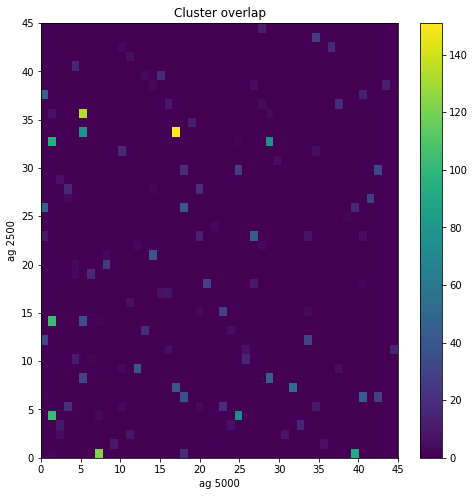

In [8]:
# Number of bins
nbins=N_CLUSTERS

plt.figure(figsize=(8,8))
plt.hist2d(ag1, ag2[:2500], bins=nbins);
plt.title("Cluster overlap")
plt.xticks(range(0, nbins, 5)); plt.yticks(range(0, nbins, 5));
plt.xlabel("ag 5000"); plt.ylabel("ag 2500");
plt.colorbar()
print('Mutual Information score: ',sklearn.metrics.adjusted_mutual_info_score(ag1, ag2[:2500]))

In [9]:
overlap = data.imgs[:2500,:,:,0][ag1 == ag2[:2500]]
overlap_c = ag1[ag1 == ag2[:2500]]



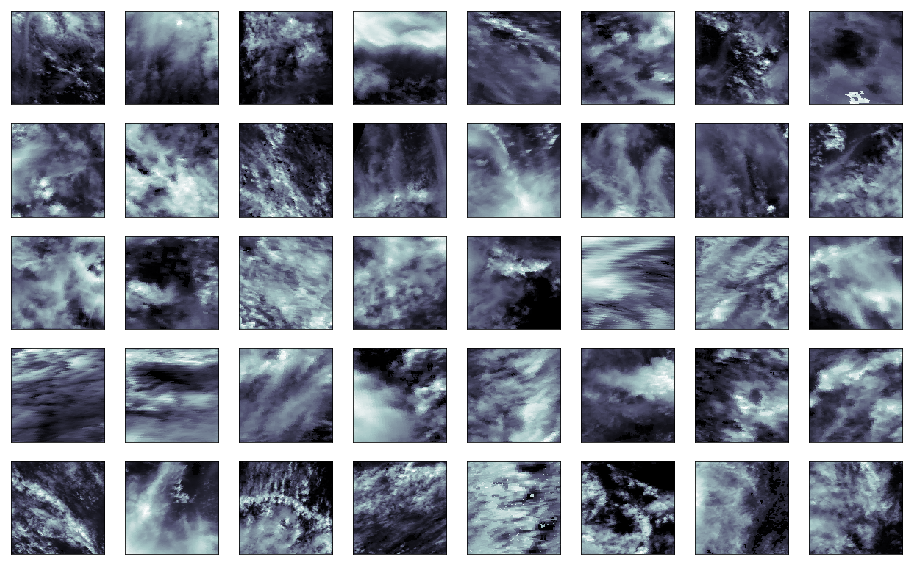

In [10]:
fig, ax = plt.subplots(5, 8, figsize=(16, 10))

clu = data.imgs[:2500,:,:,0][ag1 == 3]

for i, a in enumerate(ax.ravel()):
    a.imshow(clu[i], cmap="bone")
    a.set_xticks([])
    a.set_yticks([])



In [11]:

from scipy.cluster.hierarchy import dendrogram

In [12]:
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



Well that's not useful...

In [13]:
plt.figure(figsize=(500,100))
plot_dendrogram(ag2, labels=ag2.labels_)

AttributeError: 'numpy.ndarray' object has no attribute 'labels_'

<Figure size 36000x7200 with 0 Axes>

In [ ]:
ag2.